In [39]:
import pandas as pd
import numpy as np

In [40]:
mft_cata='relocated_catalog_updatedmag5.dat'
pd_loc=pd.read_csv(mft_cata,delim_whitespace=True)

In [41]:
pd_loc["dtime"]=pd.to_datetime(pd_loc[["year","month","day","hour","minutes","seconds"]])

In [42]:
pd_loc = pd_loc[pd_loc.latitude>=36.3]
pd_loc = pd_loc[pd_loc.latitude<=36.65]
pd_loc = pd_loc[pd_loc.longitude>=-81.3]
pd_loc = pd_loc[pd_loc.longitude<=-80.8]

In [43]:
dtt=pd_loc.dtime.values.astype(np.int64) // 10 ** 9 /86400
pd_loc["dtt"]=dtt-dtt[17]

In [44]:
pd_loc.head(20)

,evid,year,month,day,hour,minutes,seconds,latitude,longitude,depth,...,#difftimes,ex,ey,ez,et,rms_phase,rms_xcor,loc_code,dtime,dtt
0,33,2020,8,7,12,47,19.289,36.46549,-81.07816,14.650,...,8,459.48,675.44,390.23,137.107,0.0,0.379,3,2020-08-07 12:47:19.289,-1.972431
1,39,2020,8,7,23,6,48.930,36.49222,-81.17749,-0.007,...,20,631.46,968.09,0.00,337.349,0.0,0.428,3,2020-08-07 23:06:48.930,-1.542234
2,53,2020,8,8,12,35,23.615,36.46557,-81.09228,8.682,...,279,145.19,275.42,654.18,26.954,0.0,0.415,3,2020-08-08 12:35:23.615,-0.980718
3,54,2020,8,8,12,37,6.510,36.45937,-81.07979,11.808,...,8,556.63,616.93,503.46,142.727,0.0,0.106,3,2020-08-08 12:37:06.510,-0.979525
4,55,2020,8,8,12,38,37.954,36.45903,-81.07995,12.246,...,8,381.66,532.19,915.62,148.242,0.0,0.106,3,2020-08-08 12:38:37.954,-0.978472
5,57,2020,8,8,13,21,59.537,36.49065,-81.09418,6.716,...,84,675.14,557.27,626.64,131.322,0.0,0.667,3,2020-08-08 13:21:59.537,-0.948356
6,64,2020,8,8,19,16,57.905,36.49528,-81.12440,15.746,...,36,561.87,557.65,931.24,110.023,0.0,0.584,3,2020-08-08 19:16:57.905,-0.701852
7,66,2020,8,8,20,42,30.861,36.47891,-81.11566,0.593,...,408,108.67,83.57,640.61,16.983,0.0,0.417,3,2020-08-08 20:42:30.861,-0.642442
8,67,2020,8,8,23,49,5.488,36.48813,-81.09450,16.556,...,16,693.56,680.98,449.41,153.507,0.0,0.463,3,2020-08-08 23:49:05.488,-0.512870
9,68,2020,8,9,0,23,2.780,36.45812,-81.07725,14.166,...,24,829.18,791.85,0.00,150.425,0.0,0.372,3,2020-08-09 00:23:02.780,-0.489294


In [45]:
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure()

# ---- plot eq location
fig.add_trace(go.Scattermapbox(
        lat=pd_loc.latitude,
        lon=pd_loc.longitude,
        mode='markers',
        marker=go.scattermapbox.Marker(
            color=pd_loc.depth,
            size=6,
            colorscale=px.colors.cyclical.IceFire,
            cmax=max(pd_loc.depth),
            colorbar={'title': 'evdp (km)'},
            cmin=0,
            showscale=True,
        ),
        hovertemplate='<br><b>%{text}</b>'
                      '<br><b>(%{lat:.2f}, %{lon:.2f})</b>'
                     '<br><b>evdp: %{marker.color:.2f}</b>',
        text=pd_loc.dtime,
        hoverinfo='text'
    ))


# ---- update layout
fig.update_layout(
    title='Event location',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    width=600,
    mapbox=dict(
        accesstoken='pk.eyJ1IjoieWNodWFuZzM1IiwiYSI6ImNqeGtzZDluZzFkcWgzem12ZDY2cWpoemsifQ.1_ZAhhpXtE2hnkSCtKIDZw',
        style='mapbox://styles/ychuang35/cjxlwvwur15fj1cousoa18kju',
        bearing=0,
        center=dict(
            lat=36,
            lon=-82
        ),
        pitch=0,
        zoom=5,
    ),
)
fig.show()

In [62]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=pd_loc[pd_loc.dtt<=30].longitude,
    y=pd_loc[pd_loc.dtt<=30].latitude,
    z=-1*pd_loc[pd_loc.dtt<=30].depth,
    mode='markers',
    marker=dict(
        size=2,
        color=pd_loc[pd_loc.dtt<=30].dtt,                # set color to an array/list of desired values
        colorscale='IceFire',   # choose a colorscale
        opacity=0.8,
        colorbar={'title': 'Day'},
    ),
    hovertemplate='<br><b>%{text}</b>'
                      '<br><b>(%{x:.2f}, %{y:.2f})</b>',
    text=pd_loc.dtime,
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [59]:
# Forshocks

import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=pd_loc.longitude[pd_loc.dtt<=0],
    y=pd_loc.latitude[pd_loc.dtt<=0],
    z=-1*pd_loc.depth[pd_loc.dtt<=0],
    mode='markers',
    marker=dict(
        size=2,
        color=pd_loc.dtt[pd_loc.dtt<=0],                # set color to an array/list of desired values
        colorscale='IceFire',   # choose a colorscale
        opacity=0.8,
        colorbar={'title': 'Day'},
    ),
    hovertemplate='<br><b>%{text}</b>'
                      '<br><b>(%{x:.2f}, %{y:.2f})</b>',
    text=pd_loc.dtime,
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [48]:
import plotly.express as px
fig = px.scatter(pd_loc, x="dtt", y="mag",color="depth")
fig.update_layout(title='mag/depth vs time')
fig.show()

In [49]:
import plotly.express as px
fig = px.scatter(pd_loc, x="dtt", y="latitude",color="depth")
fig.update_layout(title='latitude/depth vs time')
fig.show()

In [50]:
import plotly.express as px
fig = px.scatter(pd_loc, x="dtt", y="longitude",color="depth")
fig.update_layout(title='latitude/depth vs time')
fig.show()

In [51]:
# only deal with the ones that have amgnitude determined
# mag here respect to the minimum value
temp_pd_loc=pd_loc[pd_loc.mag!='NM']
mags=pd.to_numeric(temp_pd_loc["mag"])
mags=mags-min(mags)
temp_pd_loc=temp_pd_loc.drop(columns=['mag'])
temp_pd_loc["mag"]=mags
import plotly.express as px
fig = px.scatter(temp_pd_loc, x="dtt", y="depth",size='mag',size_max=10)
fig.update_layout(title='depth vs time')
fig.show()

In [52]:
temp_pd_loc=pd_loc[pd_loc.mag!='NM']
mags=pd.to_numeric(temp_pd_loc["mag"])
temp_pd_loc=temp_pd_loc.drop(columns=['mag'])
temp_pd_loc["mag"]=mags
import plotly.express as px
df = px.data.tips()
fig = px.histogram(temp_pd_loc, x="mag")
fig.show()

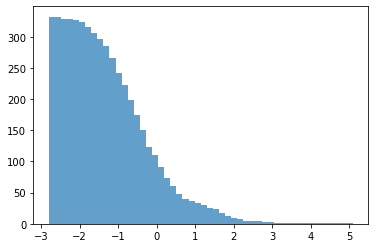

In [53]:
import numpy as np
import matplotlib.pyplot as plt
axx=plt.hist(temp_pd_loc.mag,50, histtype="stepfilled", alpha=.7, cumulative=-1)
fig = px.scatter(x=list(axx[1][0:-1]), y=list(axx[0]),log_y=True)
fig.show()